# Lab: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

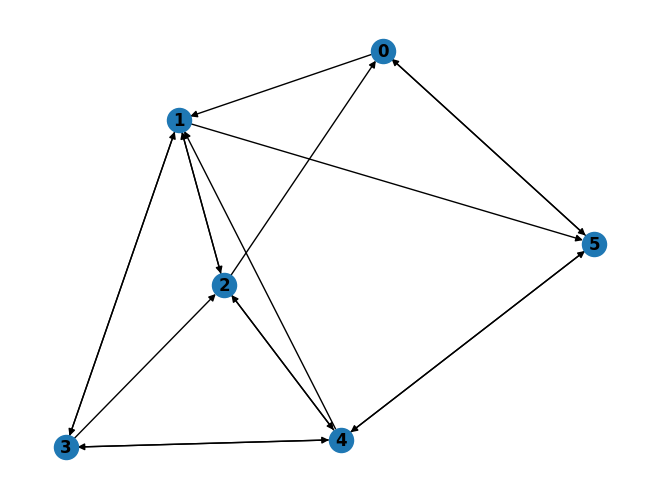

#nodes: 6, #edges: 17
node-0, #in_degrees 2, #out_degrees 2
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 3, #out_degrees 4
node-5, #in_degrees 3, #out_degrees 2
[[0 1 0 0 0 1]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [1 0 0 0 1 0]]


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 1],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [1, 0, 0, 0, 1, 0]])

G = nx.from_numpy_array(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [2]:
# Transpose the adjacency matrix
adj_t = Adj.transpose()

# Sum the incoming edges for each node
incoming_sums = adj_t.sum(axis=1)

# Diagonal of the sums of incoming edges
incoming_diag = np.diag(incoming_sums)

# Inverse of the diagonal
incoming_diag_inv = np.linalg.inv(incoming_diag)

# The transition matrix is defined as
# the inverse diagonal of the sum of incoming edges
# multiplied by the transpose of the adjacency matrix
transition_matrix = np.dot(incoming_diag_inv, adj_t)

# Transpose the transition matrix such that
# the columns sum to 1 instead of the rows
transition_matrix_t = transition_matrix.transpose()

print(transition_matrix_t)

[[0.         0.25       0.         0.         0.         0.33333333]
 [0.         0.         0.33333333 0.5        0.         0.33333333]
 [0.5        0.25       0.         0.         0.33333333 0.        ]
 [0.         0.25       0.33333333 0.         0.33333333 0.        ]
 [0.         0.25       0.33333333 0.5        0.         0.33333333]
 [0.5        0.         0.         0.         0.33333333 0.        ]]


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [3]:
# Define M as the transition matrix
M = transition_matrix_t

# Define r_0 and r_t
r_0 = np.repeat(1/6, repeats=6)
r_t = r_0

# Define epsilon as some small positive number
epsilon = 1e-8

# Define the maximum iterations we will take for power iteration
max_iterations = 1000

# Define t
t = 0

# Perform power iteration
while t < max_iterations:
    # Compute r_t_1
    r_t_1 = M.dot(r_t)

    # Compute ||r_t_1 - r_1||_1
    l1_norm_diff = np.linalg.norm(r_t_1 - r_t, ord=1)
    
    # Stop when ||r_t_1 - r_1||_1 <= epsilon
    if l1_norm_diff <= epsilon:
        break
    
    # Set r_t to r_t_1
    r_t = r_t_1

    # Increment t
    t += 1

print(r_t)

[0.08917197 0.1910828  0.17197452 0.18471338 0.2388535  0.12420382]
